In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [36]:
# def return_time(file)
root = "results"
print(sorted(os.listdir(root)))
for exp_type in sorted(os.listdir(root)):
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            print(os.path.join(root,exp_type, sf, f))

['lane', 'msbfs', 'thread']
results/lane/1/msbfs_256_1000_1000000_8.out
results/lane/1/msbfs_16_1000_1000000_12.out
results/lane/1/msbfs_512_1000_1000000_1.out
results/lane/1/msbfs_8_1000_1000000_4.out
results/lane/1/msbfs_128_1000_1000000_16.out
results/lane/1/msbfs_32_1000_1000000_12.out
results/lane/1/msbfs_32_1000_1000000_1.out
results/lane/1/msbfs_8_1000_1000000_16.out
results/lane/1/msbfs_16_1000_1000000_16.out
results/lane/1/msbfs_256_1000_1000000_1.out
results/lane/1/msbfs_512_1000_1000000_8.out
results/lane/1/msbfs_128_1000_1000000_8.out
results/lane/1/msbfs_64_1000_1000000_4.out
results/lane/1/msbfs_64_1000_1000000_12.out
results/lane/1/msbfs_16_1000_1000000_4.out
results/lane/1/msbfs_16_1000_1000000_8.out
results/lane/1/msbfs_32_1000_1000000_16.out
results/lane/1/msbfs_64_1000_1000000_2.out
results/lane/1/msbfs_128_1000_1000000_1.out
results/lane/1/msbfs_512_1000_1000000_2.out
results/lane/1/msbfs_32_1000_1000000_8.out
results/lane/1/msbfs_128_1000_1000000_4.out
results/lane

results/thread/30/vertex_64_1000_1000000_1.out
results/thread/30/vertex_64_1000_1000000_8.out
results/thread/30/vertex_64_1000_1000000_12.out
results/thread/30/edge_64_1000_1000000_8.out
results/thread/30/vertex_64_1000_1000000_2.out
results/thread/30/vertex_64_1000_1000000_16.out
results/thread/30/edge_64_1000_1000000_12.out
results/thread/30/edge_64_1000_1000000_2.out
results/thread/30/edge_64_1000_1000000_1.out
results/thread/30/edge_64_1000_1000000_4.out
results/thread/30/vertex_64_1000_1000000_4.out
results/thread/30/edge_64_1000_1000000_16.out
results/thread/300/vertex_64_1000_1000000_1.out
results/thread/300/vertex_64_1000_1000000_8.out
results/thread/300/vertex_64_1000_1000000_12.out
results/thread/300/edge_64_1000_1000000_8.out
results/thread/300/vertex_64_1000_1000000_2.out
results/thread/300/vertex_64_1000_1000000_16.out
results/thread/300/edge_64_1000_1000000_12.out
results/thread/300/edge_64_1000_1000000_2.out
results/thread/300/edge_64_1000_1000000_1.out
results/thread/30

In [37]:
result_df = pd.DataFrame(columns=["exp_type", "file", "sf", "lane_count", "vertex_count", "edge_count", "thread_count", "time"])

root = "results"
curr_dir = []
for exp_type in sorted(os.listdir(root)):
    print(exp_type)
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            with open(os.path.join(root,exp_type, sf, f)) as output_file:
                f_list = f.split("_")
                file = f_list[0]
                lane = f_list[1]
                v_cnt = f_list[2]
                e_cnt = f_list[3]
                thread = f_list[4].split(".")[0]
                for time in output_file.readlines():
                    if time.strip() == 'TIMEOUT':
                        print(time_cpy)
                        time_cpy = 30
                    else:
                        time_cpy = round(float(time.strip()), 3)
                    result_df.loc[len(result_df.index)] = [exp_type, file, sf, int(lane), v_cnt, e_cnt, int(thread), time_cpy]
# result_df.columns = 
    # get experiment config
#     with open(os.path.join(root, f, "config.json")) as config_file:

lane
5.332
30
30
17.223
30
30
30
10.695
30
17.66
30
12.481
30
30
4.922
30
8.338
24.764
5.451
4.927
6.98
4.582
3.277
17.399
2.011
1.019
0.728
21.978
30
30
25.43
30
30
30
30
30
26.718
30
30
30
30
30
30
30
30
30
30
30
30
26.825
30
30
30
30
25.283
30
21.089
30
27.516
30
30
msbfs
10.216
13.52
10.019
18.576
10.271
10.106
30
20.267
30
0.954
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
thread
0.019
0.026
0.048
0.031
0.076
30
0.125
0.086
0.503
0.138


In [38]:
result_df

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,time
0,lane,msbfs,1,256,1000,1000000,8,5.332
1,lane,msbfs,1,256,1000,1000000,8,5.307
2,lane,msbfs,1,256,1000,1000000,8,5.358
3,lane,msbfs,1,256,1000,1000000,8,5.319
4,lane,msbfs,1,256,1000,1000000,8,5.332
...,...,...,...,...,...,...,...,...
1487,thread,edge,10,64,1000,1000000,16,0.138
1488,thread,edge,10,64,1000,1000000,16,0.130
1489,thread,edge,10,64,1000,1000000,16,0.135
1490,thread,edge,10,64,1000,1000000,16,0.138


In [39]:
result_df["variant_divisor"] = result_df["lane_count"]

In [42]:
### thread plots
thread_df = result_df[result_df["exp_type"] == "thread" ]


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

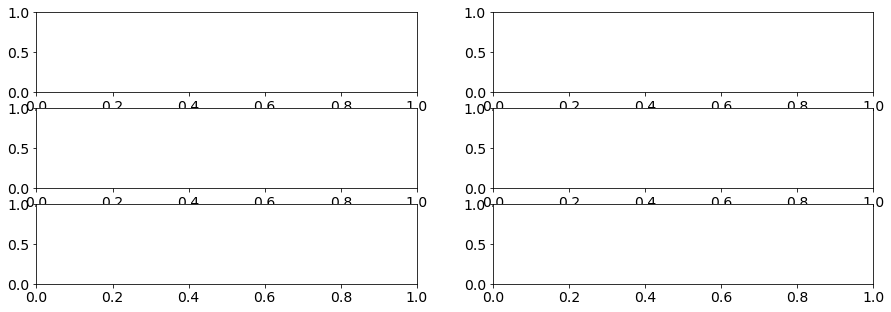

In [48]:
# thread_e_v_df = thread_df[thread_df["file"] != "msbfs"]
fig, axes = plt.subplots(3, 2, figsize=(15, 5))
axes

In [5]:
# set(result_df["sf"])
# sf_list

NameError: name 'sf_list' is not defined

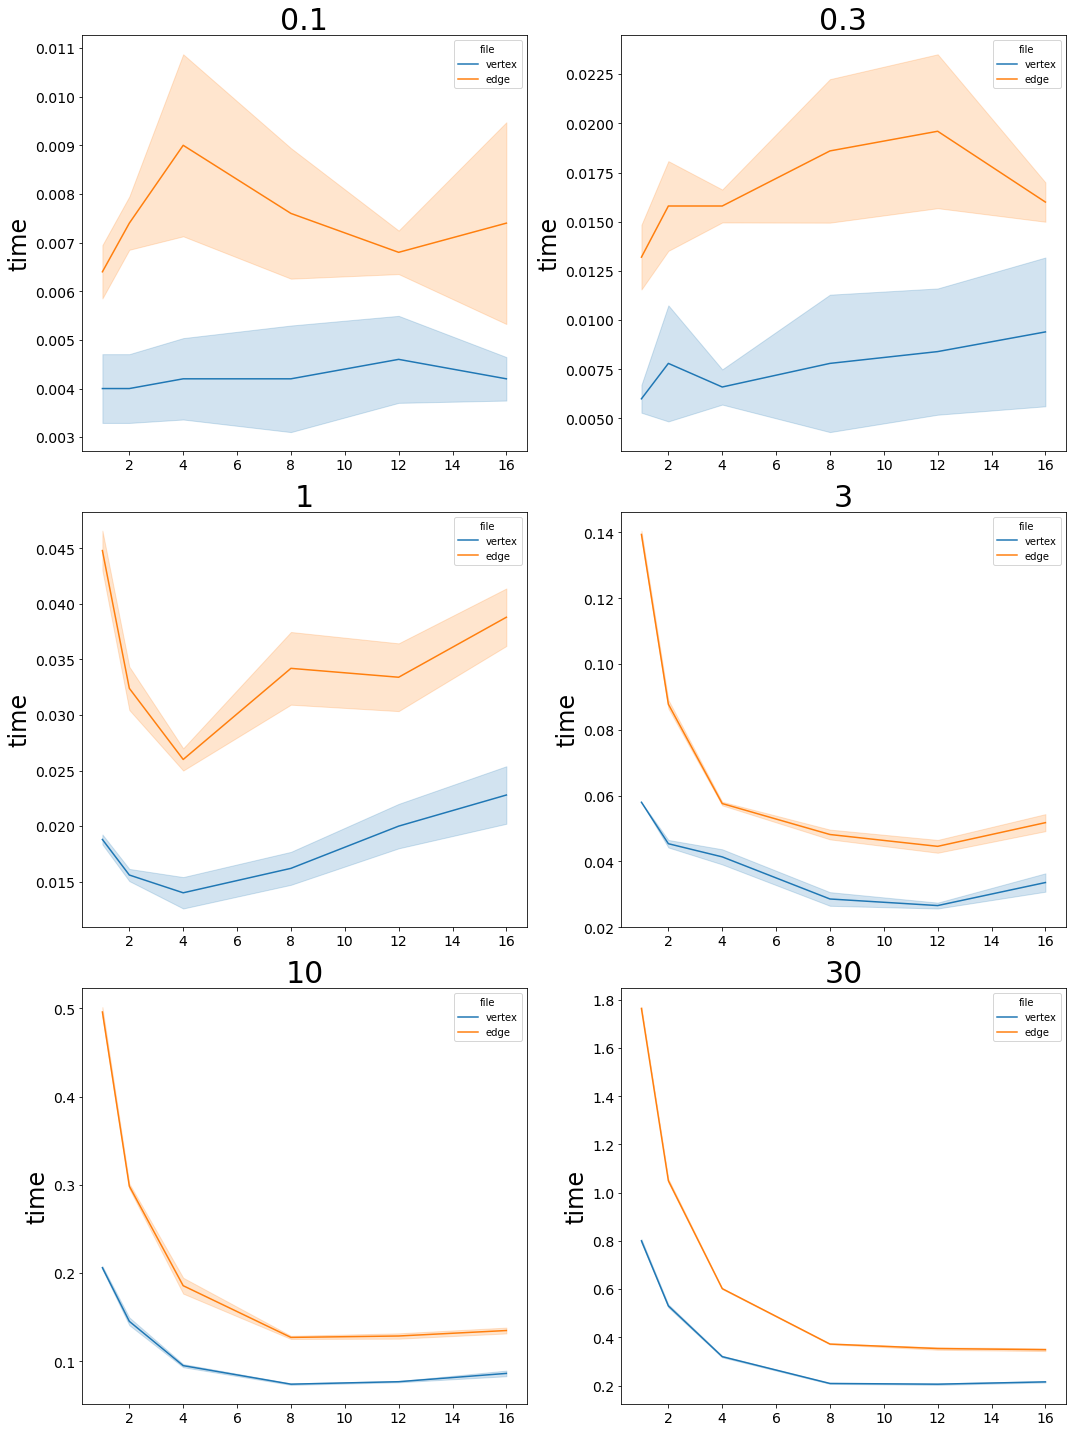

In [26]:
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
thread_create_csr_df = thread_df[thread_df["file"] != "msbfs"]
sf_list = list(set(result_df["sf"]))
sf_list = sorted(sf_list, key=float)

# for i in range(len(sf_list)):
count = 0
for i in range(3):
    for j in range(2):
        
        temp_df = thread_create_csr_df[thread_create_csr_df["sf"] == sf_list[count]]
        l = sns.lineplot(ax = axes[i][j], x="thread_count", y= "time" , hue="file", ci="sd", data=temp_df)
        l.set_title(sf_list[count],fontdict = { 'fontsize': 30})
        l.set(xlabel = None)
#         t.set( xlabel=None)
        count = count + 1
fig.tight_layout()
plt.show()


In [32]:

def plot_thread(data_df, sf_list, x="thread_count", hue="file"):
    count = 0
    for i in range(3):
        for j in range(2):
            temp_df = data_df[data_df["sf"] == sf_list[count]]
            print(sf_list[count])
            l = sns.lineplot(ax = axes[i][j], x=x, y= "time" , hue=hue, ci="sd", data=temp_df )
            l.set_title(sf_list[count],fontdict = { 'fontsize': 30})
            l.set(xlabel = None)
            count = count + 1


0.1
0.3
1
3
10
30


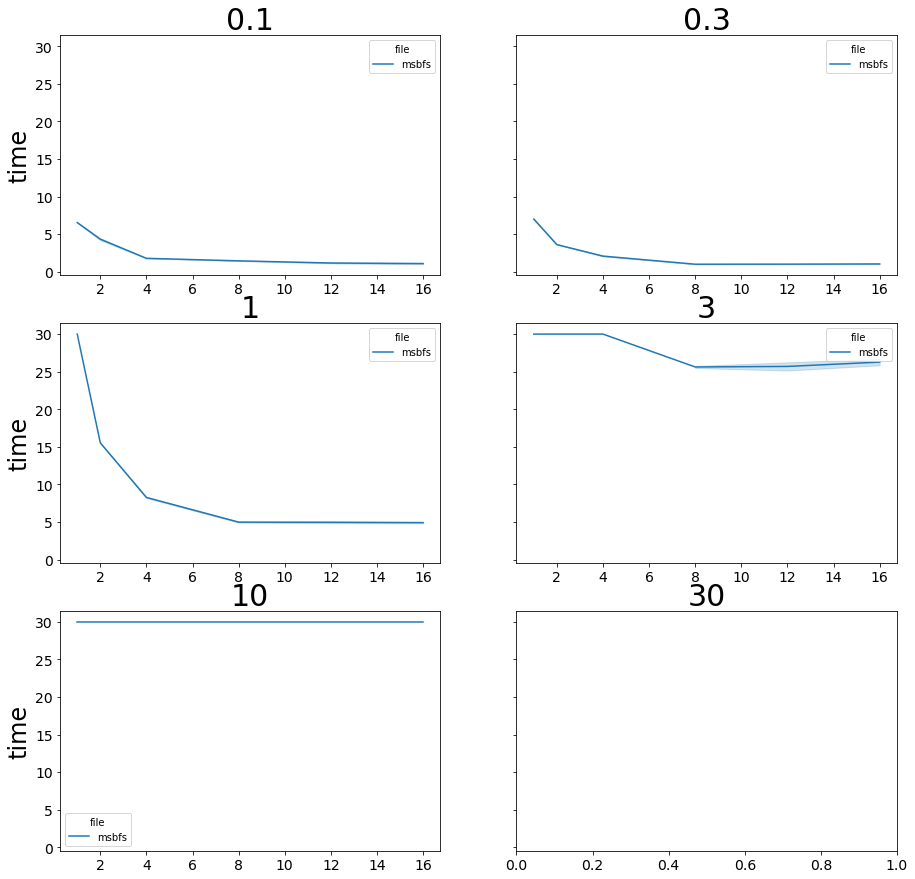

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
msbfs_df = thread_df[thread_df['file'] == "msbfs"] 
plot_thread(msbfs_df, sf_list)


In [64]:
sf_list

['10', '0.1', '3', '0.3', '1']

0.1


(0.0, 0.006)

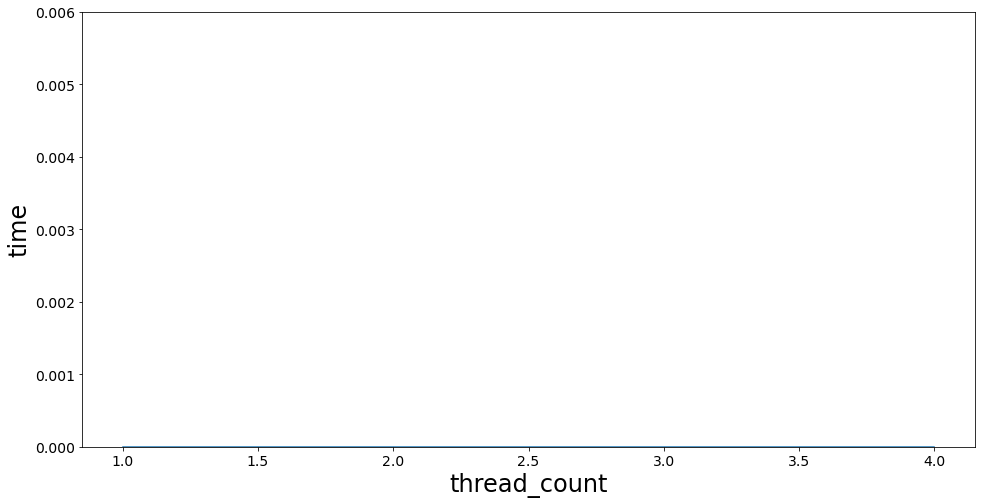

In [33]:
# i = 0
# print(sf_list[i])
# vertex_df = thread_df[thread_df['file'] == "vertex"]
# temp_df = vertex_df[vertex_df["sf"] == sf_list[i]]
# sns.lineplot(x="thread_count", y= "time" , ci="sd", data=temp_df, )
# plt.ylim([0, 0.006])



In [34]:
# lane_df = result_df[result_df["exp_type"] == "lane"]

0.1
0.3
1
3
10
30


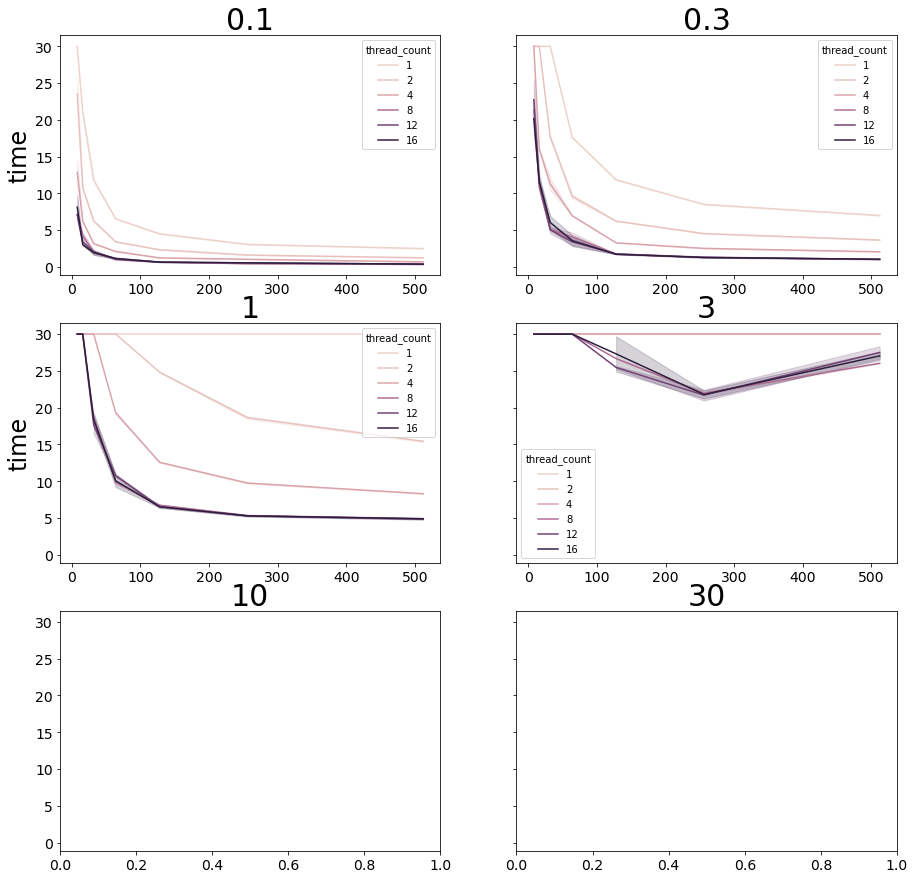

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
lane_df = result_df[result_df["exp_type"] == "lane"]
plot_thread(lane_df, sf_list, x="lane_count", hue="thread_count")

# g = sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )
# g.set_xticks([8, 16, 32, 64, 128, 256, 512])

In [40]:
variant_df = result_df[result_df["exp_type"] == "msbfs"]
variant_df
# sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,time,variant_divisor
598,msbfs,msbfs,1,4,1000,1000000,12,9.981,4
599,msbfs,msbfs,1,4,1000,1000000,12,10.458,4
600,msbfs,msbfs,1,4,1000,1000000,12,9.695,4
601,msbfs,msbfs,1,4,1000,1000000,12,10.060,4
602,msbfs,msbfs,1,4,1000,1000000,12,10.216,4
...,...,...,...,...,...,...,...,...,...
957,msbfs,msbfs,10,1,1000,1000000,4,30.000,1
958,msbfs,msbfs,10,1,1000,1000000,1,30.000,1
959,msbfs,msbfs,10,3,1000,1000000,2,30.000,3
960,msbfs,msbfs,10,3,1000,1000000,4,30.000,3


0.1
0.3
1
3
10
30


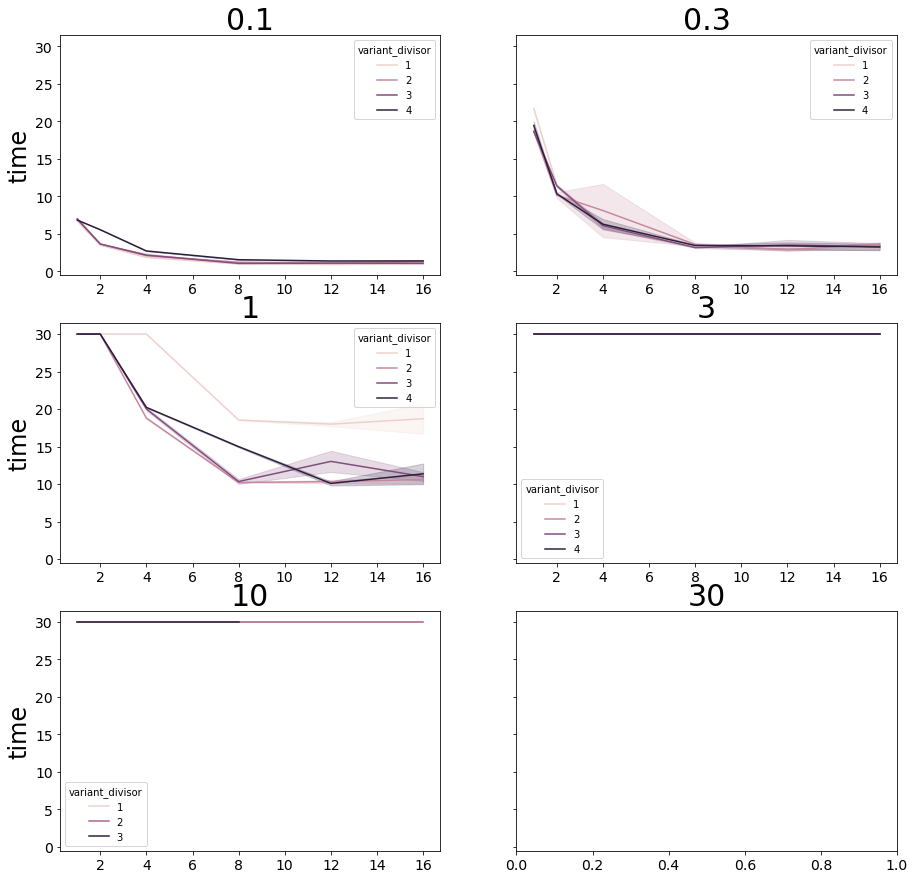

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
plot_thread(variant_df, sf_list, x="thread_count", hue="variant_divisor")

0.1
0.3
1
3
10
30


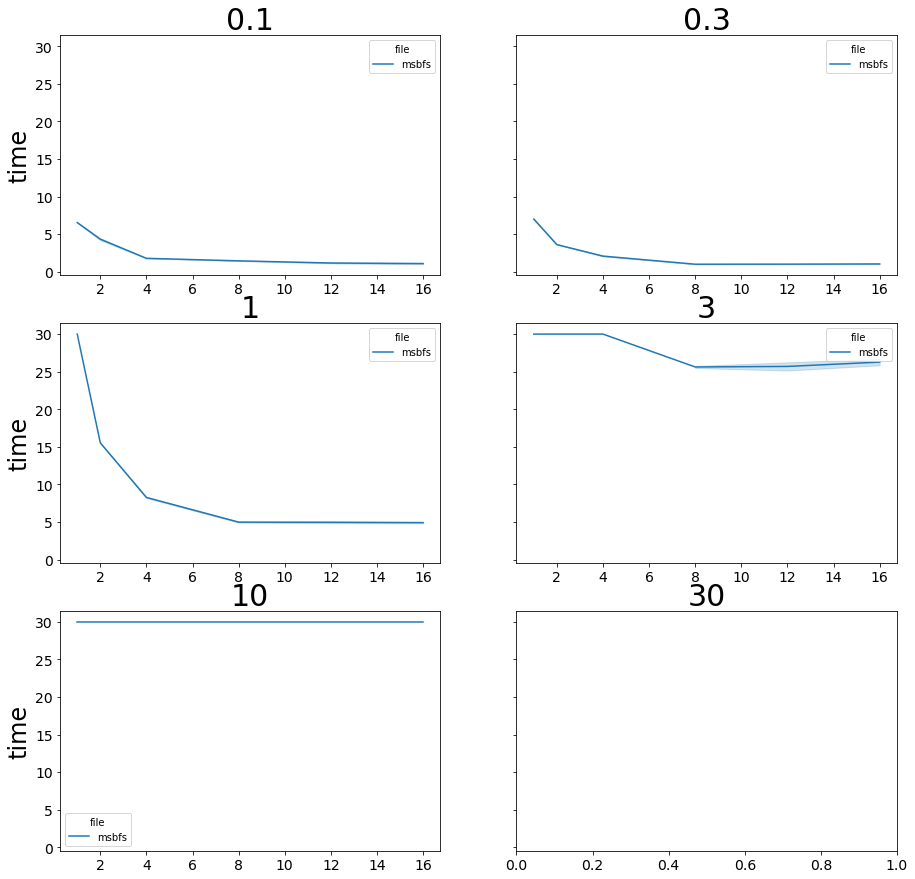

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
msbfs_df = thread_df[thread_df['file'] == "msbfs"] 
plot_thread(msbfs_df, sf_list)
